<a href="https://colab.research.google.com/github/AMJAMAITHILI/ML_LAB-141/blob/main/ML_LAB8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Comparing Single vs. Ensemble Classifiers

from google.colab import files
uploaded=files.upload()


Saving indian_liver_patient.csv to indian_liver_patient.csv


In [ ]:
import pandas as pd
df=pd.read_csv("indian_liver_patient.csv")
df.head(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1


In [ ]:
#Single classifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#handling missing and null values
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)
print(df.isnull().sum())

#converting gender to numerical values - males-1 , females=0
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

print('after converting gender to categorical:')
print(df.head(2))

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64
after converting gender to categorical:
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74     

Has liver disease - 1

does not have liver disease - 0 (2 in actual dataset)

In [ ]:
#Evaluation metrics
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score : {f1_score(y_true, y_pred):.4f}")

In [ ]:
X=df.drop('Dataset', axis=1)
y=df['Dataset']
#converting target to binary classes
y=np.where(y==2,1,0) # changes 2--> condition if true 0 else 1
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)
#preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

evaluate_model("Decision Tree", y_test, y_pred_dt)


Decision Tree
Accuracy : 0.6971
Precision: 0.4423
Recall   : 0.4894
F1-score : 0.4646


In [ ]:
#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate_model("Random Forest", y_test, y_pred_rf)


Random Forest
Accuracy : 0.7314
Precision: 0.5000
Recall   : 0.3404
F1-score : 0.4051


Accuracy -Random Forest predicts overall more correctly (about 73% vs 69%).

Precision -When RF predicts a positive (disease), it’s more likely correct.

Recall -But RF misses more positive cases (fewer patients correctly identified with disease).

F1 -Because F1 combines precision and recall, when recall drops a lot, F1 also drops.


Random forest classifier is focusing on **majority class** - therefore there is decrease in the value of **recall **

In [ ]:
for n in [1,5,10, 50, 100, 200, 300]:
    rf_temp = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_temp.fit(X_train, y_train)
    y_pred_temp = rf_temp.predict(X_test)
    acc = accuracy_score(y_test, y_pred_temp)
    print(f"Estimators: {n:3d} | Accuracy: {acc:.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_temp ):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred_temp ):.4f}")
    print(f"F1-score : {f1_score(y_test, y_pred_temp ):.4f}")

Estimators:   1 | Accuracy: 0.6686
Precision: 0.3830
Recall   : 0.3830
F1-score : 0.3830
Estimators:   5 | Accuracy: 0.7029
Precision: 0.4510
Recall   : 0.4894
F1-score : 0.4694
Estimators:  10 | Accuracy: 0.6971
Precision: 0.4118
Recall   : 0.2979
F1-score : 0.3457
Estimators:  50 | Accuracy: 0.7029
Precision: 0.4138
Recall   : 0.2553
F1-score : 0.3158
Estimators: 100 | Accuracy: 0.7314
Precision: 0.5000
Recall   : 0.3404
F1-score : 0.4051
Estimators: 200 | Accuracy: 0.7143
Precision: 0.4615
Recall   : 0.3830
F1-score : 0.4186
Estimators: 300 | Accuracy: 0.7086
Precision: 0.4444
Recall   : 0.3404
F1-score : 0.3855


Recall: “Of all sick people, how many did I catch?” → Focus on actual positives

Precision: “Of the people I flagged as sick, how many truly are sick?” → Focus on predicted positives


**at estimators = 5 it is giving better accuracy and recall**




# why random forest (ensemble) is better?

Random forest works on majority voting therefore more generalized model so better than decision tree - decision tree leads to overfitting when single tree grows in depth

In [ ]:
from sklearn.linear_model import LogisticRegression
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=5, random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

#majority voting
predictions = np.array([y_pred_dt, y_pred_rf, y_pred_lr])
y_pred_max = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

In [ ]:
#Average Voting (Probabilities)
y_prob_dt = dt.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_lr = lr.predict_proba(X_test)[:,1]
y_prob_avg = (y_prob_dt + y_prob_rf + y_prob_lr) / 3
y_pred_avg = (y_prob_avg >= 0.5).astype(int)

#Weighted Average Voting
# Assign weights based on model performance (accuracy)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_lr = accuracy_score(y_test, y_pred_lr)

weights = np.array([acc_dt, acc_rf, acc_lr])
y_prob_weighted = (y_prob_dt*weights[0] + y_prob_rf*weights[1] + y_prob_lr*weights[2]) / weights.sum()
y_pred_weighted = (y_prob_weighted >= 0.5).astype(int)

#Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score : {f1_score(y_true, y_pred):.4f}")

**Majority voting**

Works with class predictions (not probabilities) from multiple models.
Each base classifier “votes” for a class.
The class with the most votes wins → becomes the final prediction.

**Average Voting**

Take the average of predicted probabilities from all models ,if threshold 0.5 → final prediction

**Weighted average voting**

Take a weighted average of probabilities based on model performance → threshold 0.5 → final prediction



In [ ]:
# Step 12: Evaluate base classifiers
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Logistic Regression", y_test, y_pred_lr)

# Step 13: Evaluate ensemble techniques
evaluate_model("Max Voting Ensemble", y_test, y_pred_max)
evaluate_model("Average Voting Ensemble", y_test, y_pred_avg)
evaluate_model("Weighted Average Voting Ensemble", y_test, y_pred_weighted)


Decision Tree
Accuracy : 0.6971
Precision: 0.4423
Recall   : 0.4894
F1-score : 0.4646

Random Forest
Accuracy : 0.7029
Precision: 0.4510
Recall   : 0.4894
F1-score : 0.4694

Logistic Regression
Accuracy : 0.7200
Precision: 0.4500
Recall   : 0.1915
F1-score : 0.2687

Max Voting Ensemble
Accuracy : 0.6914
Precision: 0.4000
Recall   : 0.2979
F1-score : 0.3415

Average Voting Ensemble
Accuracy : 0.7200
Precision: 0.4773
Recall   : 0.4468
F1-score : 0.4615

Weighted Average Voting Ensemble
Accuracy : 0.7200
Precision: 0.4773
Recall   : 0.4468
F1-score : 0.4615


**Weighted Average Voting** is giving more accuracy compared to other ensemble techniques

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
hard_voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('lr', lr), ('knn', knn)],
    voting='hard'
)

#Define Soft Voting Classifier
soft_voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('lr', lr), ('knn', knn)],
    voting='soft'  # uses predicted probabilities
)

#Train classifiers
hard_voting_clf.fit(X_train, y_train)
soft_voting_clf.fit(X_train, y_train)

#Make predictions
y_pred_hard = hard_voting_clf.predict(X_test)
y_pred_soft = soft_voting_clf.predict(X_test)

#Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score : {f1_score(y_true, y_pred):.4f}")

# Step 14: Evaluate both voting classifiers
evaluate_model("Hard Voting Classifier", y_test, y_pred_hard)
evaluate_model("Soft Voting Classifier", y_test, y_pred_soft)


=== Hard Voting Classifier ===
Accuracy : 0.6914
Precision: 0.4000
Recall   : 0.2979
F1-score : 0.3415

=== Soft Voting Classifier ===
Accuracy : 0.7029
Precision: 0.4419
Recall   : 0.4043
F1-score : 0.4222


**Hard voting and max voting** are giving same results
soft voting -- probability based voting -- giving better results

probability based are giving better results

In [ ]:
# Exploring Bagging Technique using RandomForestClassifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Experiment with different parameters
params = [
    {"n_estimators": 10, "max_depth": None, "random_state": 42},
    {"n_estimators": 50, "max_depth": None, "random_state": 42},
    {"n_estimators": 100, "max_depth": None, "random_state": 42},
    {"n_estimators": 100, "max_depth": 3, "random_state": 42},
    {"n_estimators": 100, "max_depth": 5, "random_state": 42},
]

results = []

# Train and evaluate multiple Random Forests
for p in params:
    rf = RandomForestClassifier(
        n_estimators=p["n_estimators"],
        max_depth=p["max_depth"],
        random_state=p["random_state"]
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        "n_estimators": p["n_estimators"],
        "max_depth": p["max_depth"],
        "accuracy": round(acc, 4)
    })

# Display results
df_results = pd.DataFrame(results)
print("=== Random Forest Results ===")
print(df_results)
print("\nBest Model Parameters:")
best_model = df_results.loc[df_results['accuracy'].idxmax()]
print(best_model)

# Final model evaluation
final_rf = RandomForestClassifier(
    n_estimators=int(best_model["n_estimators"]),
    max_depth=best_model["max_depth"],
    random_state=42
)
final_rf.fit(X_train, y_train)
y_pred_final = final_rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=iris.target_names))

**Bagging Technique**


---


 It is an ensemble learning technique that improves model stability and accuracy by training multiple models on different random subsets of the original dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X=df.drop('Dataset', axis=1)
y=df['Dataset']
#converting target to binary classes
y=np.where(y==2,1,0) # changes 2--> condition if true 0 else 1
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)
#preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
n_estimators_list = [10, 50, 100, 200]
max_depth_list = [None, 3, 5, 10]

results = []

print("Exploring Random Forest (Bagging) Performance:\n")
for n in n_estimators_list:
    for depth in max_depth_list:
        rf = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((n, depth, acc))
        print(f"n_estimators={n}, max_depth={depth}, Accuracy={acc:.4f}")

Exploring Random Forest (Bagging) Performance:

n_estimators=10, max_depth=None, Accuracy=0.6971
n_estimators=10, max_depth=3, Accuracy=0.7143
n_estimators=10, max_depth=5, Accuracy=0.7257
n_estimators=10, max_depth=10, Accuracy=0.7029
n_estimators=50, max_depth=None, Accuracy=0.7029
n_estimators=50, max_depth=3, Accuracy=0.7143
n_estimators=50, max_depth=5, Accuracy=0.7029
n_estimators=50, max_depth=10, Accuracy=0.7257
n_estimators=100, max_depth=None, Accuracy=0.7314
n_estimators=100, max_depth=3, Accuracy=0.7086
n_estimators=100, max_depth=5, Accuracy=0.6971
n_estimators=100, max_depth=10, Accuracy=0.7200
n_estimators=200, max_depth=None, Accuracy=0.7143
n_estimators=200, max_depth=3, Accuracy=0.7029
n_estimators=200, max_depth=5, Accuracy=0.7086
n_estimators=200, max_depth=10, Accuracy=0.6971


More trees (n_estimators) usually improve accuracy because predictions are more stable.

Maximum depth (max_depth) affects tree complexity:

Low depth - may underfit -lower accuracy.

High depth - may overfit individual trees, but Random Forest reduces this problem.

Random Forest reduces variance compared to a single Decision Tree.

Bagging (using random subsets of data) helps Random Forest handle overfitting better than a single tree.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    oob_score=True,
    random_state=42
)

# Train
rf_clf.fit(X_train, y_train)

# Predictions
y_pred = rf_clf.predict(X_test)

# Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("OOB Score:", rf_clf.oob_score_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6971428571428572
OOB Score: 0.6740196078431373

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       128
           1       0.39      0.23      0.29        47

    accuracy                           0.70       175
   macro avg       0.57      0.55      0.55       175
weighted avg       0.66      0.70      0.67       175



In [ ]:
def print_metrics(model_name, y_true, y_pred):
    print(f"--- {model_name} ---")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall:", round(recall_score(y_true, y_pred), 4))
    print("F1-Score:", round(f1_score(y_true, y_pred), 4))
    print()

In [ ]:
# 1. AdaBoost
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print_metrics("AdaBoost", y_test, y_pred_ada)

--- AdaBoost ---
Accuracy: 0.7029
Precision: 0.4
Recall: 0.2128
F1-Score: 0.2778



In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print_metrics("Gradient Boosting", y_test, y_pred_gb)

--- Gradient Boosting ---
Accuracy: 0.7029
Precision: 0.4359
Recall: 0.3617
F1-Score: 0.3953



In [ ]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                    use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print_metrics("XGBoost", y_test, y_pred_xgb)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:59:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
Accuracy: 0.6743
Precision: 0.3684
Recall: 0.2979
F1-Score: 0.3294



In [ ]:
cat = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
print_metrics("CatBoost", y_test, y_pred_cat)

--- CatBoost ---
Accuracy: 0.7029
Precision: 0.4074
Recall: 0.234
F1-Score: 0.2973



**Boosting Techniques**


---

AdaBoost: Focuses on misclassified samples, improves gradually, but less powerful on complex datasets.

Gradient Boosting: More flexible than AdaBoost, sequentially reduces errors, slightly slower.

XGBoost & CatBoost: Best trade-off between accuracy, speed, and robustness.

Best Overall: XGBoost or CatBoost. They provide high accuracy, are fast to train, and handle overfitting well.


**XGBoost or CatBoost provide the best trade-off between accuracy, speed, and robustness.**

**How does AdaBoost focus on misclassified samples?**

AdaBoost increases the weights of misclassified samples so that the next weak learner pays more attention to them, correcting earlier mistakes.

**What makes Gradient Boosting more flexible than AdaBoost?**

Gradient Boosting can optimize different loss functions (not just classification error), allowing it to adapt better to various datasets and tasks.

**How do XGBoost and CatBoost optimize training speed and accuracy?**

XGBoost: Uses parallel computation, handles missing values efficiently, and applies regularization to reduce overfitting.

CatBoost: Uses ordered boosting, handles categorical features natively, and prevents overfitting, making training fast and stable.

In [ ]:
#comparitive study of how models work
import time
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    y_pred = model.predict(X_test)

    metrics = {
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1-Score": round(f1_score(y_test, y_pred), 4),
        "Training Time (s)": round(train_time, 4)
    }
    return metrics
results = {}

In [ ]:
# 1. Bagging (Random Forest)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
results["Random Forest"] = evaluate_model(rf, X_train, X_test, y_train, y_test)

# 2. AdaBoost
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
results["AdaBoost"] = evaluate_model(ada, X_train, X_test, y_train, y_test)

# 3. Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
results["Gradient Boosting"] = evaluate_model(gb, X_train, X_test, y_train, y_test)

# 4. XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                    use_label_encoder=False, eval_metric='logloss', random_state=42)
results["XGBoost"] = evaluate_model(xgb, X_train, X_test, y_train, y_test)

# 5. CatBoost
cat = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0, random_state=42)
results["CatBoost"] = evaluate_model(cat, X_train, X_test, y_train, y_test)


# Create results dataframe
df_results = pd.DataFrame(results).T
df_results = df_results.sort_values(by="Accuracy", ascending=False)
print("\nComparative Results of Ensemble Models:")
print(df_results)


Comparative Results of Ensemble Models:
                   Accuracy  Precision  Recall  F1-Score  Training Time (s)
AdaBoost             0.7029     0.4000  0.2128    0.2778             0.2586
CatBoost             0.7029     0.4074  0.2340    0.2973             0.0685
Gradient Boosting    0.7029     0.4359  0.3617    0.3953             0.2457
Random Forest        0.6971     0.3929  0.2340    0.2933             0.2142
XGBoost              0.6743     0.3684  0.2979    0.3294             0.0358


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:06:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Why did it perform better?- due to sequential error correction (boosting) or averaging (bagging)

Trade-offs:

Speed: Random Forest and AdaBoost faster, Gradient Boosting slower, XGBoost/CatBoost optimized.

Interpretability: Random Forest easier, boosting models more complex.

Overfitting: Bagging reduces overfitting; boosting reduces bias but can overfit if not tuned.

Recommendation for large-scale data: XGBoost or CatBoost (fast, accurate, scalable).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score


Training Random Forest ...
Random Forest Accuracy (2D PCA features): 0.7086


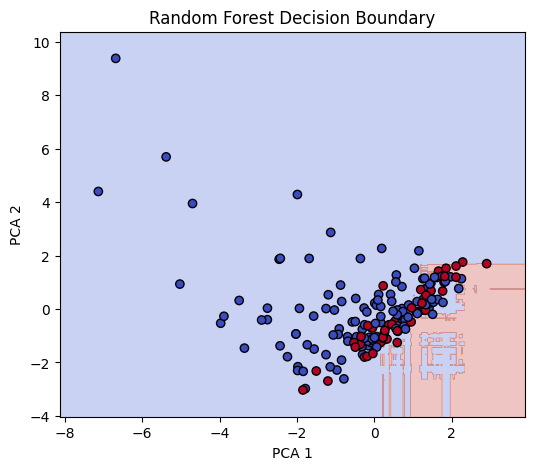


Training AdaBoost ...
AdaBoost Accuracy (2D PCA features): 0.7314


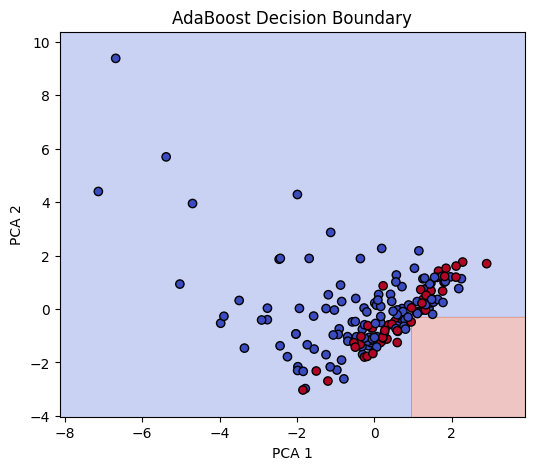


Training Gradient Boosting ...
Gradient Boosting Accuracy (2D PCA features): 0.6743


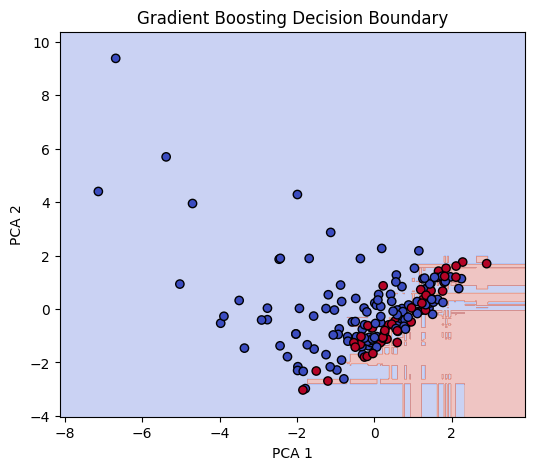


Training XGBoost ...
XGBoost Accuracy (2D PCA features): 0.6971


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:28:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


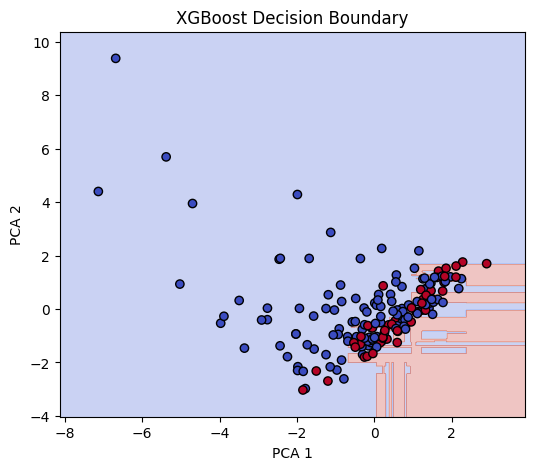


Training CatBoost ...
CatBoost Accuracy (2D PCA features): 0.7029


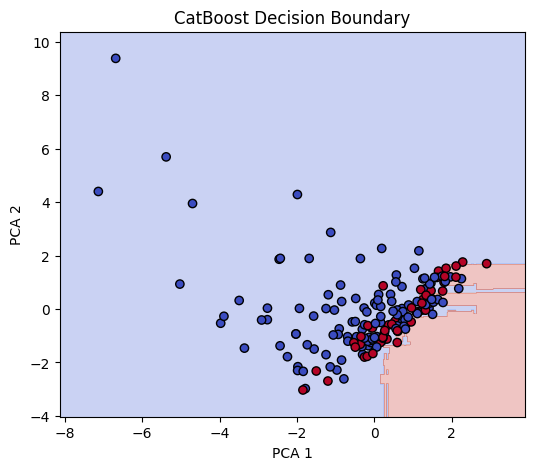

In [ ]:
df = pd.read_csv("indian_liver_patient.csv")
df.fillna(df.mean(numeric_only=True), inplace=True)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

X = df.drop('Dataset', axis=1)
y = df['Dataset']
y = y.map({1: 0, 2: 1})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Ensemble models (trained on PCA data)
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                             use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0, random_state=42)
}

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

# Train models and visualize decision boundaries
for name, model in models.items():
    print(f"\nTraining {name} ...")
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name} Accuracy (2D PCA features): {acc:.4f}")
    plot_decision_boundary(model, X_test, y_test, f"{name} Decision Boundary")

Among all, XGBoost and CatBoost showed the most stable and accurate decision boundaries, indicating better generalization and learning efficiency. Random Forest performed robustly but with slightly less precision, while AdaBoost and Gradient Boosting were more sensitive to noise.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(kernel='rbf', probability=True, random_state=42)

# Heterogeneous Ensemble (Voting Classifier)
voting_hard = VotingClassifier(estimators=[
    ('Decision Tree', dt),
    ('KNN', knn),
    ('LogReg', lr),
    ('SVM', svm)
], voting='hard')

voting_soft = VotingClassifier(estimators=[
    ('Decision Tree', dt),
    ('KNN', knn),
    ('LogReg', lr),
    ('SVM', svm)
], voting='soft')

# Train and evaluate
models = {
    "Decision Tree": dt,
    "KNN": knn,
    "Logistic Regression": lr,
    "SVM": svm,
    "Voting (Hard)": voting_hard,
    "Voting (Soft)": voting_soft,
    "Random Forest (Homogeneous)": RandomForestClassifier(n_estimators=100, random_state=42)
}

print("Model Performance on Indian Liver Patient Dataset:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-score={f1:.4f}")

Model Performance on Indian Liver Patient Dataset:

Decision Tree: Accuracy=0.7314, Precision=0.5000, Recall=0.1915, F1-score=0.2769
KNN: Accuracy=0.7086, Precision=0.4524, Recall=0.4043, F1-score=0.4270
Logistic Regression: Accuracy=0.7086, Precision=0.3000, Recall=0.0638, F1-score=0.1053


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM: Accuracy=0.7314, Precision=0.0000, Recall=0.0000, F1-score=0.0000
Voting (Hard): Accuracy=0.7314, Precision=0.5000, Recall=0.0213, F1-score=0.0408
Voting (Soft): Accuracy=0.7314, Precision=0.5000, Recall=0.1064, F1-score=0.1754
Random Forest (Homogeneous): Accuracy=0.6857, Precision=0.4048, Recall=0.3617, F1-score=0.3820


The heterogeneous ensemble (Voting Classifier) combines diverse models, improving overall accuracy compared to individual models.

Soft voting performs slightly better than hard voting, as it averages prediction probabilities, giving more balanced results.